In [48]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer



In [49]:
df = pd.read_csv('clinicalData.csv')
data = df.copy()

In [50]:
# for col in data.columns:
#     if data[col].dtype == 'object':  
#         print(f"\nColumn Name: {col}")
#         print(data[col].value_counts())

In [51]:
# legend = {}
# for col in data.columns:
#     if data[col].dtype == 'object':  # if the column is categorical
#         unique_values = data[col].unique()
#         legend[col] = {value: i for i, value in enumerate(unique_values)}

# # Print the legend
# for original_column, mapping in legend.items():
#     print(f"{original_column} - Legend:")
#     for original_value in mapping.items():
#         print(f"  {original_value}")

In [52]:
# value_counts = data['surgery_type'].value_counts()
# print(value_counts)

In [53]:
# value_counts = df['family_history'].value_counts()
# print(value_counts)

In [54]:
# preTrt_columns = [col for col in data.columns if col.endswith('_preTrt')]
# preTrt_columns1 = [col for col in data.columns if col.startswith('preTrt')]
# postTrt_columns = [col for col in data.columns if 'postTrt' in col]
# print(postTrt_columns)
# print(preTrt_columns1)
# print(preTrt_columns)

In [55]:
# data['RFS'].value_counts()

In [56]:
#create a new columns
# data['surgery_type'] = data['surgery_type'].replace('breast_preserving', 'masectomy')
# data['preTrt_lymph_node_status'] = data['preTrt_lymph_node_status'].replace('breast_preserving', 'masectomy')



In [57]:
# #dropping columns
# data.drop(['dbUniquePatientID', 'study_ID', 'patient_ID', 'GEO_GSMID', 'platform_ID', 'GEO_platform_ID', 'AE_platform_ID', 'original_study_patient_ID', 'site_ID', 'site_ID_preprocessed', 'treatment_protocol_number', 'clinical_AJCC_stage', 'age_bin_description', 'age_bin', 'nationality', 'tumor_size_cm_preTrt_preSurgeryMin', 'treatment_protocol_number', 'chemotherapyClass', 'relapseOneYearVsThreePlus', 'PTEN_mutation', 'PTEN_pos', 'p53_mutation', 'clinical_AJCC_stageRangeMin', 'clinical_AJCC_stageRangeMax', 'tumor_stage_preTrtMin', 'tumor_stage_preTrtMax', 'hist_gradeMax', 'hist_gradeMin', 'path_diagnosis', 'path', 'chemosensitivity_prediction', 'months_from_surgery_measured_RCB', 'RFS_months_or_MIN_months_of_RFS', 'DFS_months_or_MIN_months_of_DFS', 'OS_months_or_MIN_months_of_OS', 'OS_up_until_death', 'relapseOneYearVsFivePlus',  'p53', 'DNA_index', 'study_specific_protocol_number', 'biopsy_postTrt_days', 'immediate_biol_target', 'preTrt_numPosLymphNodesRemoved', 'postTrt_totalLymphNodes', 'notthingham_prognostic_index', 'months_until_first_event_or_last_checkup', 'ER_percentage_preTrt', 'ER_expr_preTrt','PR_expr_preTrt', 'HER2_expr_preTrt', 'HER2_SNP6_state', 'p53_mutation_type', 'PIK3CA_mutation', 'family_history', 'relapse_beforeYR1', 'metastasis_stage_preTrt'], axis=1, inplace=True)

# data.columns

In [58]:
# dfN = pd.read_csv('clinicalVarDef.csv')

In [59]:
# start = 42
# end = 43 

# rows_to_delete = list(range(start, end + 1))
# rows_to_delete = [106] 


# dfN = dfN.drop(dfN.index[rows_to_delete])

# dfN = dfN.reset_index(drop=True)

# dfN.head(15)

In [60]:
# dfN.to_csv('legend.csv', index=False)

In [61]:
#dropping columns
data.drop(['dbUniquePatientID', 'study_ID', 'patient_ID', 'GEO_GSMID', 'platform_ID', 'GEO_platform_ID', 'AE_platform_ID', 'original_study_patient_ID', 'site_ID', 'site_ID_preprocessed', 'treatment_protocol_number', 'age_bin_description', 'age_bin', 'nationality', 'tumor_size_cm_preTrt_preSurgeryMin', 'treatment_protocol_number', 'chemotherapyClass', 'relapseOneYearVsThreePlus', 'PTEN_mutation', 'PTEN_pos', 'p53_mutation', 'clinical_AJCC_stageRangeMin', 'clinical_AJCC_stageRangeMax', 'tumor_stage_preTrtMin', 'tumor_stage_preTrtMax', 'hist_gradeMax', 'hist_gradeMin', 'path_diagnosis', 'path', 'chemosensitivity_prediction', 'months_from_surgery_measured_RCB', 'RFS_months_or_MIN_months_of_RFS', 'DFS_months_or_MIN_months_of_DFS', 'OS_months_or_MIN_months_of_OS', 'OS_up_until_death', 'relapseOneYearVsFivePlus', 'p53', 'DNA_index', 'study_specific_protocol_number', 'biopsy_postTrt_days', 'immediate_biol_target', 'preTrt_numPosLymphNodesRemoved', 'postTrt_totalLymphNodes', 'notthingham_prognostic_index', 'months_until_first_event_or_last_checkup', 'ER_percentage_preTrt', 'ER_expr_preTrt','PR_expr_preTrt', 'HER2_expr_preTrt', 'HER2_SNP6_state', 'p53_mutation_type', 'PIK3CA_mutation', 'family_history', 'relapse_beforeYR1', 'metastasis_stage_preTrt', 'taxaneGeneral', 'dead', 'hormone_therapyClass'], axis=1, inplace=True)

data.head(3)

,biopsy_preTreat,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,clinical_AJCC_stage,preTrt_lymph_node_status,postTrt_lymph_node_status,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,...,trastuzumab,letrozole,chemotherapy,hormone_therapy,no_treatment,methotrexate,cetuximab,carboplatin,other,neoadjuvant_or_adjuvant
0,1,NaN,NaN,NaN,NaN,IIIA,positive,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neo
1,1,NaN,NaN,NaN,NaN,IIIA,positive,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neo
2,1,NaN,NaN,NaN,NaN,IIIA,positive,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neo


In [62]:
#renaming columns
data = data.rename(columns={'other': 'other_treatment'})
data = data.rename(columns={'radiotherapyClass': 'radiotherapy'})
data = data.rename(columns={'surgery_type': 'surgery'})


# data = data.rename(columns={'surgery_type': 'Decision 1 surgery'})
# data = data.rename(columns={'chemotherapy': 'Decision 2 chemotherapy'})

In [63]:
df1 = pd.read_csv('synthetic_data.csv')
df1_reset = df1.reset_index(drop=True)
concat = pd.concat([data, df1_reset])
concat.to_csv('combined.csv', index=False)
concat.reset_index(drop=True, inplace=True) 

concat.drop(['Data Source'], axis=1, inplace=True)

data = concat.copy()



In [64]:
# print("Min:", data['metastasis_stage_preTrt'].min())
# print("Max:", data['metastasis_stage_preTrt'].max())

In [65]:
#replacing nan values

# numerical and categorical columns
num_cols = [col for col in data.columns if data[col].dtype != 'object']
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

#  one-hot encoded columns
one_hot_cols = [col for col in num_cols if set(data[col].unique()).issubset({0, 1})]

# Exclude one-hot encoded columns
num_cols = list(set(num_cols) - set(one_hot_cols))

# Create transformers for numerical and categorical columns
num_transformer = KNNImputer(n_neighbors=5)
cat_transformer = SimpleImputer(strategy='most_frequent')

# Apply transformations to the numerical and categorical columns
num_data_imputed = num_transformer.fit_transform(data[num_cols])
cat_data_imputed = cat_transformer.fit_transform(data[cat_cols])

# Convert back to df
num_data_imputed = pd.DataFrame(num_data_imputed, columns=num_cols)
cat_data_imputed = pd.DataFrame(cat_data_imputed, columns=cat_cols)

# Concat df
data_imputed = pd.concat([num_data_imputed, cat_data_imputed, data[one_hot_cols]], axis=1)

# to maintain the original order
data_imputed = data_imputed.reindex(columns=data.columns)

# Round to the nearest int
data_imputed[num_cols] = data_imputed[num_cols].round()

In [66]:
for column, dtype in data_imputed.dtypes.items():
    print(f"'{column}', Dtype: {dtype}")


'biopsy_preTreat', Dtype: float64
'pCR_postTrt_days', Dtype: float64
'tumor_size_cm_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_secondAxis_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_postTrt', Dtype: float64
'clinical_AJCC_stage', Dtype: object
'preTrt_lymph_node_status', Dtype: object
'postTrt_lymph_node_status', Dtype: object
'preTrt_totalLymphNodes', Dtype: float64
'preTrt_numPosLymphNodes', Dtype: float64
'postTrt_numPosLymphNodes', Dtype: float64
'preTrt_posDichLymphNodes', Dtype: float64
'tumor_stage_preTrt', Dtype: object
'tumor_stage_postTrt', Dtype: object
'pam50', Dtype: object
'hist_grade', Dtype: float64
'nuclear_grade_preTrt', Dtype: float64
'pCR', Dtype: float64
'near_pCR', Dtype: float64
'pCR_spectrum', Dtype: object
'RCB', Dtype: object
'RFS', Dtype: float64
'DFS', Dtype: float64
'OS', Dtype: float64
'metastasis', Dtype: float64
'metastasis_months', Dtype: float64
'died_from_cancer_if_dead', Dtype: float64
'age', Dtype: float64
'race', Dtype: object
'menopau

In [67]:

# # Loop through the columns
for col in data_imputed.columns:
    print(f"Column: {col}")
    
    # Check if the column is numerical
    if data_imputed[col].dtype in ['int64', 'float64']:
        print("Min:", data_imputed[col].min())
        print("Max:", data_imputed[col].max())

Column: biopsy_preTreat
Min: 1.0
Max: 1.0
Column: pCR_postTrt_days
Min: 84.0
Max: 84.0
Column: tumor_size_cm_preTrt_preSurgery
Min: 0.0
Max: 25.0
Column: tumor_size_cm_secondAxis_preTrt_preSurgery
Min: 3.0
Max: 8.0
Column: tumor_size_cm_postTrt
Min: 0.0
Max: 4.0
Column: clinical_AJCC_stage
Column: preTrt_lymph_node_status
Column: postTrt_lymph_node_status
Column: preTrt_totalLymphNodes
Min: 0.0
Max: 40.0
Column: preTrt_numPosLymphNodes
Min: 0.0
Max: 33.0
Column: postTrt_numPosLymphNodes
Min: 0.0
Max: 17.0
Column: preTrt_posDichLymphNodes
Min: 0.0
Max: 1.0
Column: tumor_stage_preTrt
Column: tumor_stage_postTrt
Column: pam50
Column: hist_grade
Min: 1.0
Max: 3.0
Column: nuclear_grade_preTrt
Min: 1.0
Max: 3.0
Column: pCR
Min: 0.0
Max: 1.0
Column: near_pCR
Min: 0.0
Max: 1.0
Column: pCR_spectrum
Column: RCB
Column: RFS
Min: 0.0
Max: 1.0
Column: DFS
Min: 0.0
Max: 1.0
Column: OS
Min: 0.0
Max: 1.0
Column: metastasis
Min: 0.0
Max: 1.0
Column: metastasis_months
Min: 1.0
Max: 35.0
Column: died_fro

In [68]:
# columns to convert
columns_to_convert = ['pCR_postTrt_days', 'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes', 'postTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'hist_grade', 'nuclear_grade_preTrt', 'pCR', 'near_pCR', 'RFS', 'DFS', 'OS', 'metastasis', 'metastasis_months','died_from_cancer_if_dead', 'age', 'ER_preTrt', 'ER_fmolmg_preTrt', 'ESR1_preTrt', 'ERbb2_preTrt', 'Erbeta_preTrt', 'ERBB2_CPN_amplified', 'PR_preTrt', 'PR_percentage_preTrt', 'PR_fmolmg_preTrt', 'HER2_preTrt', 'HER2_fish_cont_score_preTrt',  'cytokeratin5_pos', 'top2atri_preTrt', 'topoihc_preTrt', 'S_phase', 'intarvenous', 'intramuscular', 'oral', 'postmenopausal_only', 'anthracycline', 'taxane', 'anti_estrogen', 'aromatase_inhibitor', 'estrogen_receptor_blocker', 'estrogen_receptor_blocker_and_stops_production', 'estrogen_receptor_blocker_and_eliminator', 'anti_HER2', 'tamoxifen', 'doxorubicin', 'epirubicin', 'docetaxel', 'capecitabine', 'fluorouracil', 'paclitaxel', 'cyclophosphamide', 'anastrozole', 'fulvestrant', 'gefitinib', 
'trastuzumab', 'letrozole', 'chemotherapy', 'hormone_therapy', 'no_treatment', 'methotrexate', 'cetuximab', 'carboplatin','other_treatment']

# Convert columns
for column in columns_to_convert:
    data_imputed[column] = data_imputed[column].round().astype(int)

In [69]:
value_counts = data_imputed['menopausal_status'].value_counts()
print(value_counts)

menopausal_status
post    8312
pre      139
Name: count, dtype: int64


In [70]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 82 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   biopsy_preTreat                                 8451 non-null   float64
 1   pCR_postTrt_days                                8451 non-null   int64  
 2   tumor_size_cm_preTrt_preSurgery                 8451 non-null   float64
 3   tumor_size_cm_secondAxis_preTrt_preSurgery      8451 non-null   float64
 4   tumor_size_cm_postTrt                           8451 non-null   float64
 5   clinical_AJCC_stage                             8451 non-null   object 
 6   preTrt_lymph_node_status                        8451 non-null   object 
 7   postTrt_lymph_node_status                       8451 non-null   object 
 8   preTrt_totalLymphNodes                          8451 non-null   int64  
 9   preTrt_numPosLymphNodes                  

In [71]:


# Encoding values
encoded_data = pd.get_dummies(data_imputed)

#boolean columns to integer type
bool_columns = encoded_data.select_dtypes(include=['bool']).columns
encoded_data[bool_columns] = encoded_data[bool_columns].astype(int)

# Print the legend
legend = {}
for col in data_imputed.columns:
    if data_imputed[col].dtype == 'object':  
        unique_values = data_imputed[col].unique()
        legend[col] = {value: i for i, value in enumerate(unique_values)}

for original_column, mapping in legend.items():
    print(f"{original_column} - Legend:")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value} : {encoded_value}")


clinical_AJCC_stage - Legend:
  IIIA : 0
  IIB : 1
  IIIB : 2
  IIA : 3
  I : 4
  IIIC : 5
  II : 6
  III : 7
  IV : 8
preTrt_lymph_node_status - Legend:
  positive : 0
  N0 : 1
  N1 : 2
  ND : 3
  N2 : 4
  N3 : 5
postTrt_lymph_node_status - Legend:
  N0 : 0
  N1a : 1
  N3 : 2
  N2a : 3
  N2 : 4
  N1 : 5
  positive : 6
tumor_stage_preTrt - Legend:
  T3 : 0
  T2 : 1
  T4 : 2
  T1 : 3
  T0 : 4
tumor_stage_postTrt - Legend:
  T1c : 0
  T0 : 1
  T1b : 2
  T1 : 3
  T2 : 4
  T1a : 5
  T1mic : 6
  Tis : 7
pam50 - Legend:
  Basal : 0
  Luminal B : 1
  Luminal A : 2
  Her2 : 3
  Normal : 4
  Claudin : 5
pCR_spectrum - Legend:
  PR : 0
  PD : 1
  SD : 2
  CR : 3
  NCR : 4
  EPD : 5
  NE : 6
RCB - Legend:
  II : 0
  2 : 1
  3 : 2
  0 : 3
  1 : 4
  III : 5
  0/I : 6
race - Legend:
  white : 0
  asian : 1
  mixed : 2
  black : 3
  hispanic : 4
menopausal_status - Legend:
  post : 0
  pre : 1
HER2_IHC_score_preTrt - Legend:
  NEG : 0
  1 : 1
  0 : 2
  3 : 3
  2 : 4
  ND : 5
ploidy - Legend:
  aneupl

In [72]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Columns: 145 entries, biopsy_preTreat to neoadjuvant_or_adjuvant_unspecified
dtypes: float64(5), int64(140)
memory usage: 9.3 MB


In [73]:
for column, dtype in encoded_data.dtypes.items():
    print(f"'{column}', Dtype: {dtype}")

'biopsy_preTreat', Dtype: float64
'pCR_postTrt_days', Dtype: int64
'tumor_size_cm_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_secondAxis_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_postTrt', Dtype: float64
'preTrt_totalLymphNodes', Dtype: int64
'preTrt_numPosLymphNodes', Dtype: int64
'postTrt_numPosLymphNodes', Dtype: int64
'preTrt_posDichLymphNodes', Dtype: int64
'hist_grade', Dtype: int64
'nuclear_grade_preTrt', Dtype: int64
'pCR', Dtype: int64
'near_pCR', Dtype: int64
'RFS', Dtype: int64
'DFS', Dtype: int64
'OS', Dtype: int64
'metastasis', Dtype: int64
'metastasis_months', Dtype: int64
'died_from_cancer_if_dead', Dtype: int64
'age', Dtype: int64
'ER_preTrt', Dtype: int64
'ER_fmolmg_preTrt', Dtype: int64
'ESR1_preTrt', Dtype: int64
'ERbb2_preTrt', Dtype: int64
'Erbeta_preTrt', Dtype: int64
'ERBB2_CPN_amplified', Dtype: int64
'PR_preTrt', Dtype: int64
'PR_percentage_preTrt', Dtype: int64
'PR_fmolmg_preTrt', Dtype: int64
'HER2_preTrt', Dtype: int64
'HER2_fish_cont_score_pre

In [74]:
value_counts = encoded_data['neoadjuvant_or_adjuvant_mixed'].value_counts()
print(value_counts)

neoadjuvant_or_adjuvant_mixed
0    8265
1     186
Name: count, dtype: int64


In [75]:
# #encoding values
# encoded_data = pd.get_dummies(data_imputed)

# legend = {}
# for col in data_imputed.columns:
#     if data_imputed[col].dtype == 'object':  # if the column is categorical
#         unique_values = data_imputed[col].unique()
#         legend[col] = {value: i for i, value in enumerate(unique_values)}

# # Print the legend
# for original_column, mapping in legend.items():
#     print(f"{original_column} - Legend:")
#     for original_value, encoded_value in mapping.items():
#         print(f"  {original_value} : {encoded_value}")

In [83]:
value_counts = encoded_data['menopausal_status_pre'].value_counts()
print(value_counts)

menopausal_status_pre
0    8312
1     139
Name: count, dtype: int64


In [77]:


# value_counts = data_imputed['preTrt_lymph_node_status_N0'].value_counts()
# print(value_counts)

In [78]:
encoded_data.head(3)

,biopsy_preTreat,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,...,HER2_IHC_score_preTrt_NEG,ploidy_aneuploid,ploidy_diploid,ploidy_multiploid,surgery_breast preserving,surgery_mastectomy,neoadjuvant_or_adjuvant_adj,neoadjuvant_or_adjuvant_mixed,neoadjuvant_or_adjuvant_neo,neoadjuvant_or_adjuvant_unspecified
0,1.0,84,3.0,6.0,1.0,12,3,1,1,3,...,1,1,0,0,1,0,0,0,1,0
1,1.0,84,3.0,6.0,0.0,15,0,4,1,3,...,1,1,0,0,1,0,0,0,1,0
2,1.0,84,3.0,6.0,1.0,17,2,10,1,2,...,1,1,0,0,1,0,0,0,1,0


In [79]:
# # Get a list of float columns
# float_cols = data.select_dtypes(include=['float64']).columns.tolist()
# print('Float columns:', float_cols)

# # Get a list of int columns
# int_cols = data.select_dtypes(include=['int64']).columns.tolist()
# print('Int columns:', int_cols)

In [80]:
encoded_data.to_csv('processed_data.csv', index=False)

In [84]:
encoded_data.columns

Index(['biopsy_preTreat', 'pCR_postTrt_days',
       'tumor_size_cm_preTrt_preSurgery',
       'tumor_size_cm_secondAxis_preTrt_preSurgery', 'tumor_size_cm_postTrt',
       'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes',
       'postTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'hist_grade',
       ...
       'HER2_IHC_score_preTrt_NEG', 'ploidy_aneuploid', 'ploidy_diploid',
       'ploidy_multiploid', 'surgery_breast preserving', 'surgery_mastectomy',
       'neoadjuvant_or_adjuvant_adj', 'neoadjuvant_or_adjuvant_mixed',
       'neoadjuvant_or_adjuvant_neo', 'neoadjuvant_or_adjuvant_unspecified'],
      dtype='object', length=145)

In [81]:
# new_df = encoded_data[[ 'tumor_size_cm_postTrt', 'DFS', 'RFS', 'postTrt_numPosLymphNodes', 'metastasis', 'metastasis_months', 'died_from_cancer_if_dead']].copy()
# new_df.head(3)
# new_df.to_csv('columns.csv', index=False)

In [82]:
# encoded_data['tumor_size_cm_postTrt'].value_counts()


Main preprocessing

In [57]:
df = pd.read_csv('processed_data.csv')
df.columns

Index(['biopsy_preTreat', 'pCR_postTrt_days',
       'tumor_size_cm_preTrt_preSurgery',
       'tumor_size_cm_secondAxis_preTrt_preSurgery', 'tumor_size_cm_postTrt',
       'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes',
       'postTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'hist_grade',
       ...
       'HER2_IHC_score_preTrt_NEG', 'ploidy_aneuploid', 'ploidy_diploid',
       'ploidy_multiploid', 'surgery_breast preserving', 'surgery_mastectomy',
       'neoadjuvant_or_adjuvant_adj', 'neoadjuvant_or_adjuvant_mixed',
       'neoadjuvant_or_adjuvant_neo', 'neoadjuvant_or_adjuvant_unspecified'],
      dtype='object', length=145)

In [61]:
value_counts = df['OS'].value_counts()
print(value_counts)

OS
1    5569
0    2882
Name: count, dtype: int64


In [43]:

feature_range = {col: {'min': df[col].min(), 'max': df[col].max()} for col in df.columns}

for col, values in feature_range.items():
    print(f"'{col}': ({values['min']}, {values['max']}),")


'biopsy_preTreat': (1.0, 1.0),
'pCR_postTrt_days': (84, 84),
'tumor_size_cm_preTrt_preSurgery': (0.0, 25.0),
'tumor_size_cm_secondAxis_preTrt_preSurgery': (3.0, 8.0),
'tumor_size_cm_postTrt': (0.0, 4.0),
'preTrt_totalLymphNodes': (0, 40),
'preTrt_numPosLymphNodes': (0, 33),
'postTrt_numPosLymphNodes': (0, 17),
'preTrt_posDichLymphNodes': (0, 1),
'hist_grade': (1, 3),
'nuclear_grade_preTrt': (1, 3),
'pCR': (0, 1),
'near_pCR': (0, 1),
'RFS': (0, 1),
'DFS': (0, 1),
'OS': (0, 1),
'metastasis': (0, 1),
'metastasis_months': (1, 35),
'died_from_cancer_if_dead': (0, 1),
'age': (24, 92),
'ER_preTrt': (0, 1),
'ER_fmolmg_preTrt': (0, 620),
'ESR1_preTrt': (0, 1),
'ERbb2_preTrt': (0, 1),
'Erbeta_preTrt': (0, 1),
'ERBB2_CPN_amplified': (0, 1),
'PR_preTrt': (0, 1),
'PR_percentage_preTrt': (0, 95),
'PR_fmolmg_preTrt': (0, 990),
'HER2_preTrt': (0, 1),
'HER2_fish_cont_score_preTrt': (0, 20),
'cytokeratin5_pos': (0, 1),
'top2atri_preTrt': (-1, 1),
'topoihc_preTrt': (0, 90),
'S_phase': (1, 36),
'intarveno

In [44]:
df.shape

(8451, 145)

In [45]:
df.describe()


,biopsy_preTreat,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,...,HER2_IHC_score_preTrt_NEG,ploidy_aneuploid,ploidy_diploid,ploidy_multiploid,surgery_type_breast preserving,surgery_type_mastectomy,neoadjuvant_or_adjuvant_adj,neoadjuvant_or_adjuvant_mixed,neoadjuvant_or_adjuvant_neo,neoadjuvant_or_adjuvant_unspecified
count,8451.0,8451.0,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,...,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000
mean,1.0,84.0,3.341380,5.207076,0.900485,13.119749,1.674595,3.931606,0.199976,2.407762,...,0.969471,0.998343,0.001183,0.000473,0.995030,0.004970,0.134422,0.022009,0.830553,0.013016
std,0.0,0.0,1.743699,0.459176,0.512022,3.789847,2.039235,2.964693,0.400006,0.526106,...,0.172048,0.040670,0.034381,0.021752,0.070326,0.070326,0.341125,0.146722,0.375169,0.113350
min,1.0,84.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,84.0,2.000000,5.000000,1.000000,11.000000,0.000000,2.000000,0.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,84.0,3.000000,5.000000,1.000000,13.000000,1.000000,3.000000,0.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,84.0,4.000000,5.000000,1.000000,16.000000,3.000000,5.000000,0.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,84.0,25.000000,8.000000,4.000000,40.000000,33.000000,17.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Main EDA (on final dataset)

In [6]:
%pip install seaborn
%pip install vpython
%pip install xgboost
%pip install visuals


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement visuals (from versions: none)
ERROR: No matching distribution

In [9]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
# import visuals as vs
from mpl_toolkits.mplot3d import axes3d
from vpython import *
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree

from xgboost import XGBClassifier

%matplotlib inline

# Set Random Seed
np.random.seed(42)
np.random.RandomState(42)

RandomState(MT19937) at 0x106C9C740

In [65]:
df = pd.read_csv('dataset.csv')
df.head(3)

,biopsy_preTreat,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,...,tumor_stage_preTrt,pam50,pCR_spectrum,RCB,menopausal_status,HER2_IHC_score_preTrt,ploidy,estrogen_receptor,surgery,therapy
0,Y,84,3.0,6.0,1.0,12,3,1,1,3,...,T3,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo
1,Y,84,3.0,6.0,0.0,15,0,4,1,3,...,T3,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo
2,Y,84,3.0,6.0,1.0,17,2,10,1,2,...,T3,Basal,PR,II,post,NEG,aneuploid,NOS,preserving,neo


Analyzing data

In [66]:
df.describe()


,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,nuclear_grade_preTrt,...,age,ER_fmolmg_preTrt,PR_percentage_preTrt,PR_fmolmg_preTrt,HER2_fish_cont_score_preTrt,top2atri_preTrt,topoihc_preTrt,S_phase,postmenopausal_only,tamoxifen
count,8451.0,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,...,8451.000000,8451.00000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000,8451.000000
mean,84.0,3.341380,5.207076,0.900485,13.119749,1.674595,3.931606,0.199976,2.407762,2.204946,...,52.409892,115.95610,36.148385,188.288132,2.472488,0.000710,22.119039,8.954088,0.037274,0.490120
std,0.0,1.743699,0.459176,0.512022,3.789847,2.039235,2.964693,0.400006,0.526106,0.408060,...,8.151888,67.94725,20.224251,93.400087,1.271646,0.093578,9.738694,2.378010,0.189443,0.499932
min,84.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,24.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
25%,84.0,2.000000,5.000000,1.000000,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,...,48.000000,73.00000,19.000000,116.000000,1.000000,0.000000,15.000000,8.000000,0.000000,0.000000
50%,84.0,3.000000,5.000000,1.000000,13.000000,1.000000,3.000000,0.000000,2.000000,2.000000,...,52.000000,118.00000,39.000000,207.000000,2.000000,0.000000,19.000000,9.000000,0.000000,0.000000
75%,84.0,4.000000,5.000000,1.000000,16.000000,3.000000,5.000000,0.000000,3.000000,2.000000,...,56.000000,143.00000,49.000000,216.000000,3.000000,0.000000,29.000000,9.000000,0.000000,1.000000
max,84.0,25.000000,8.000000,4.000000,40.000000,33.000000,17.000000,1.000000,3.000000,3.000000,...,92.000000,620.00000,95.000000,990.000000,20.000000,1.000000,90.000000,36.000000,1.000000,1.000000


In [67]:
df.columns

Index(['biopsy_preTreat', 'pCR_postTrt_days',
       'tumor_size_cm_preTrt_preSurgery',
       'tumor_size_cm_secondAxis_preTrt_preSurgery', 'tumor_size_cm_postTrt',
       'preTrt_totalLymphNodes', 'preTrt_numPosLymphNodes',
       'postTrt_numPosLymphNodes', 'preTrt_posDichLymphNodes', 'hist_grade',
       'nuclear_grade_preTrt', 'pCR', 'near_pCR', 'RFS', 'DFS', 'OS',
       'metastasis', 'metastasis_months', 'died_from_cancer_if_dead', 'age',
       'ER_preTrt', 'ER_fmolmg_preTrt', 'ESR1_preTrt', 'ERbb2_preTrt',
       'Erbeta_preTrt', 'ERBB2_CPN_amplified', 'PR_preTrt',
       'PR_percentage_preTrt', 'PR_fmolmg_preTrt', 'HER2_preTrt',
       'HER2_fish_cont_score_preTrt', 'cytokeratin5_pos', 'top2atri_preTrt',
       'topoihc_preTrt', 'S_phase', 'radiotherapy', 'postmenopausal_only',
       'anthracycline', 'taxane', 'anti_estrogen', 'aromatase_inhibitor',
       'anti_HER2', 'tamoxifen', 'doxorubicin', 'epirubicin', 'docetaxel',
       'capecitabine', 'fluorouracil', 'paclitaxel',

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 78 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   biopsy_preTreat                             8451 non-null   object 
 1   pCR_postTrt_days                            8451 non-null   int64  
 2   tumor_size_cm_preTrt_preSurgery             8451 non-null   float64
 3   tumor_size_cm_secondAxis_preTrt_preSurgery  8451 non-null   float64
 4   tumor_size_cm_postTrt                       8451 non-null   float64
 5   preTrt_totalLymphNodes                      8451 non-null   int64  
 6   preTrt_numPosLymphNodes                     8451 non-null   int64  
 7   postTrt_numPosLymphNodes                    8451 non-null   int64  
 8   preTrt_posDichLymphNodes                    8451 non-null   int64  
 9   hist_grade                                  8451 non-null   int64  
 10  nuclear_grad

In [69]:
value_counts = df['OS'].value_counts()
print(value_counts)

OS
1    5569
0    2882
Name: count, dtype: int64


Preparing data

In [70]:
# target variable
y = df["OS"]

# or
# y_OS = df['OS']
y_died = df['died_from_cancer_if_dead']

# features variables
X = df.drop(["OS", "died_from_cancer_if_dead"], axis=1)


In [71]:


# value_counts = df['OS'].value_counts()
# print(value_counts)

In [72]:
# df['pCR_postTrt_days'].dtype

In [73]:

for column, dtype in X.dtypes.items():
    print(f"'{column}', Dtype: {dtype}")

'biopsy_preTreat', Dtype: object
'pCR_postTrt_days', Dtype: int64
'tumor_size_cm_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_secondAxis_preTrt_preSurgery', Dtype: float64
'tumor_size_cm_postTrt', Dtype: float64
'preTrt_totalLymphNodes', Dtype: int64
'preTrt_numPosLymphNodes', Dtype: int64
'postTrt_numPosLymphNodes', Dtype: int64
'preTrt_posDichLymphNodes', Dtype: int64
'hist_grade', Dtype: int64
'nuclear_grade_preTrt', Dtype: int64
'pCR', Dtype: object
'near_pCR', Dtype: object
'RFS', Dtype: int64
'DFS', Dtype: int64
'metastasis', Dtype: object
'metastasis_months', Dtype: int64
'age', Dtype: int64
'ER_preTrt', Dtype: object
'ER_fmolmg_preTrt', Dtype: int64
'ESR1_preTrt', Dtype: object
'ERbb2_preTrt', Dtype: object
'Erbeta_preTrt', Dtype: object
'ERBB2_CPN_amplified', Dtype: object
'PR_preTrt', Dtype: object
'PR_percentage_preTrt', Dtype: int64
'PR_fmolmg_preTrt', Dtype: int64
'HER2_preTrt', Dtype: object
'HER2_fish_cont_score_preTrt', Dtype: int64
'cytokeratin5_pos', Dtype: objec

Looking for correlation between features


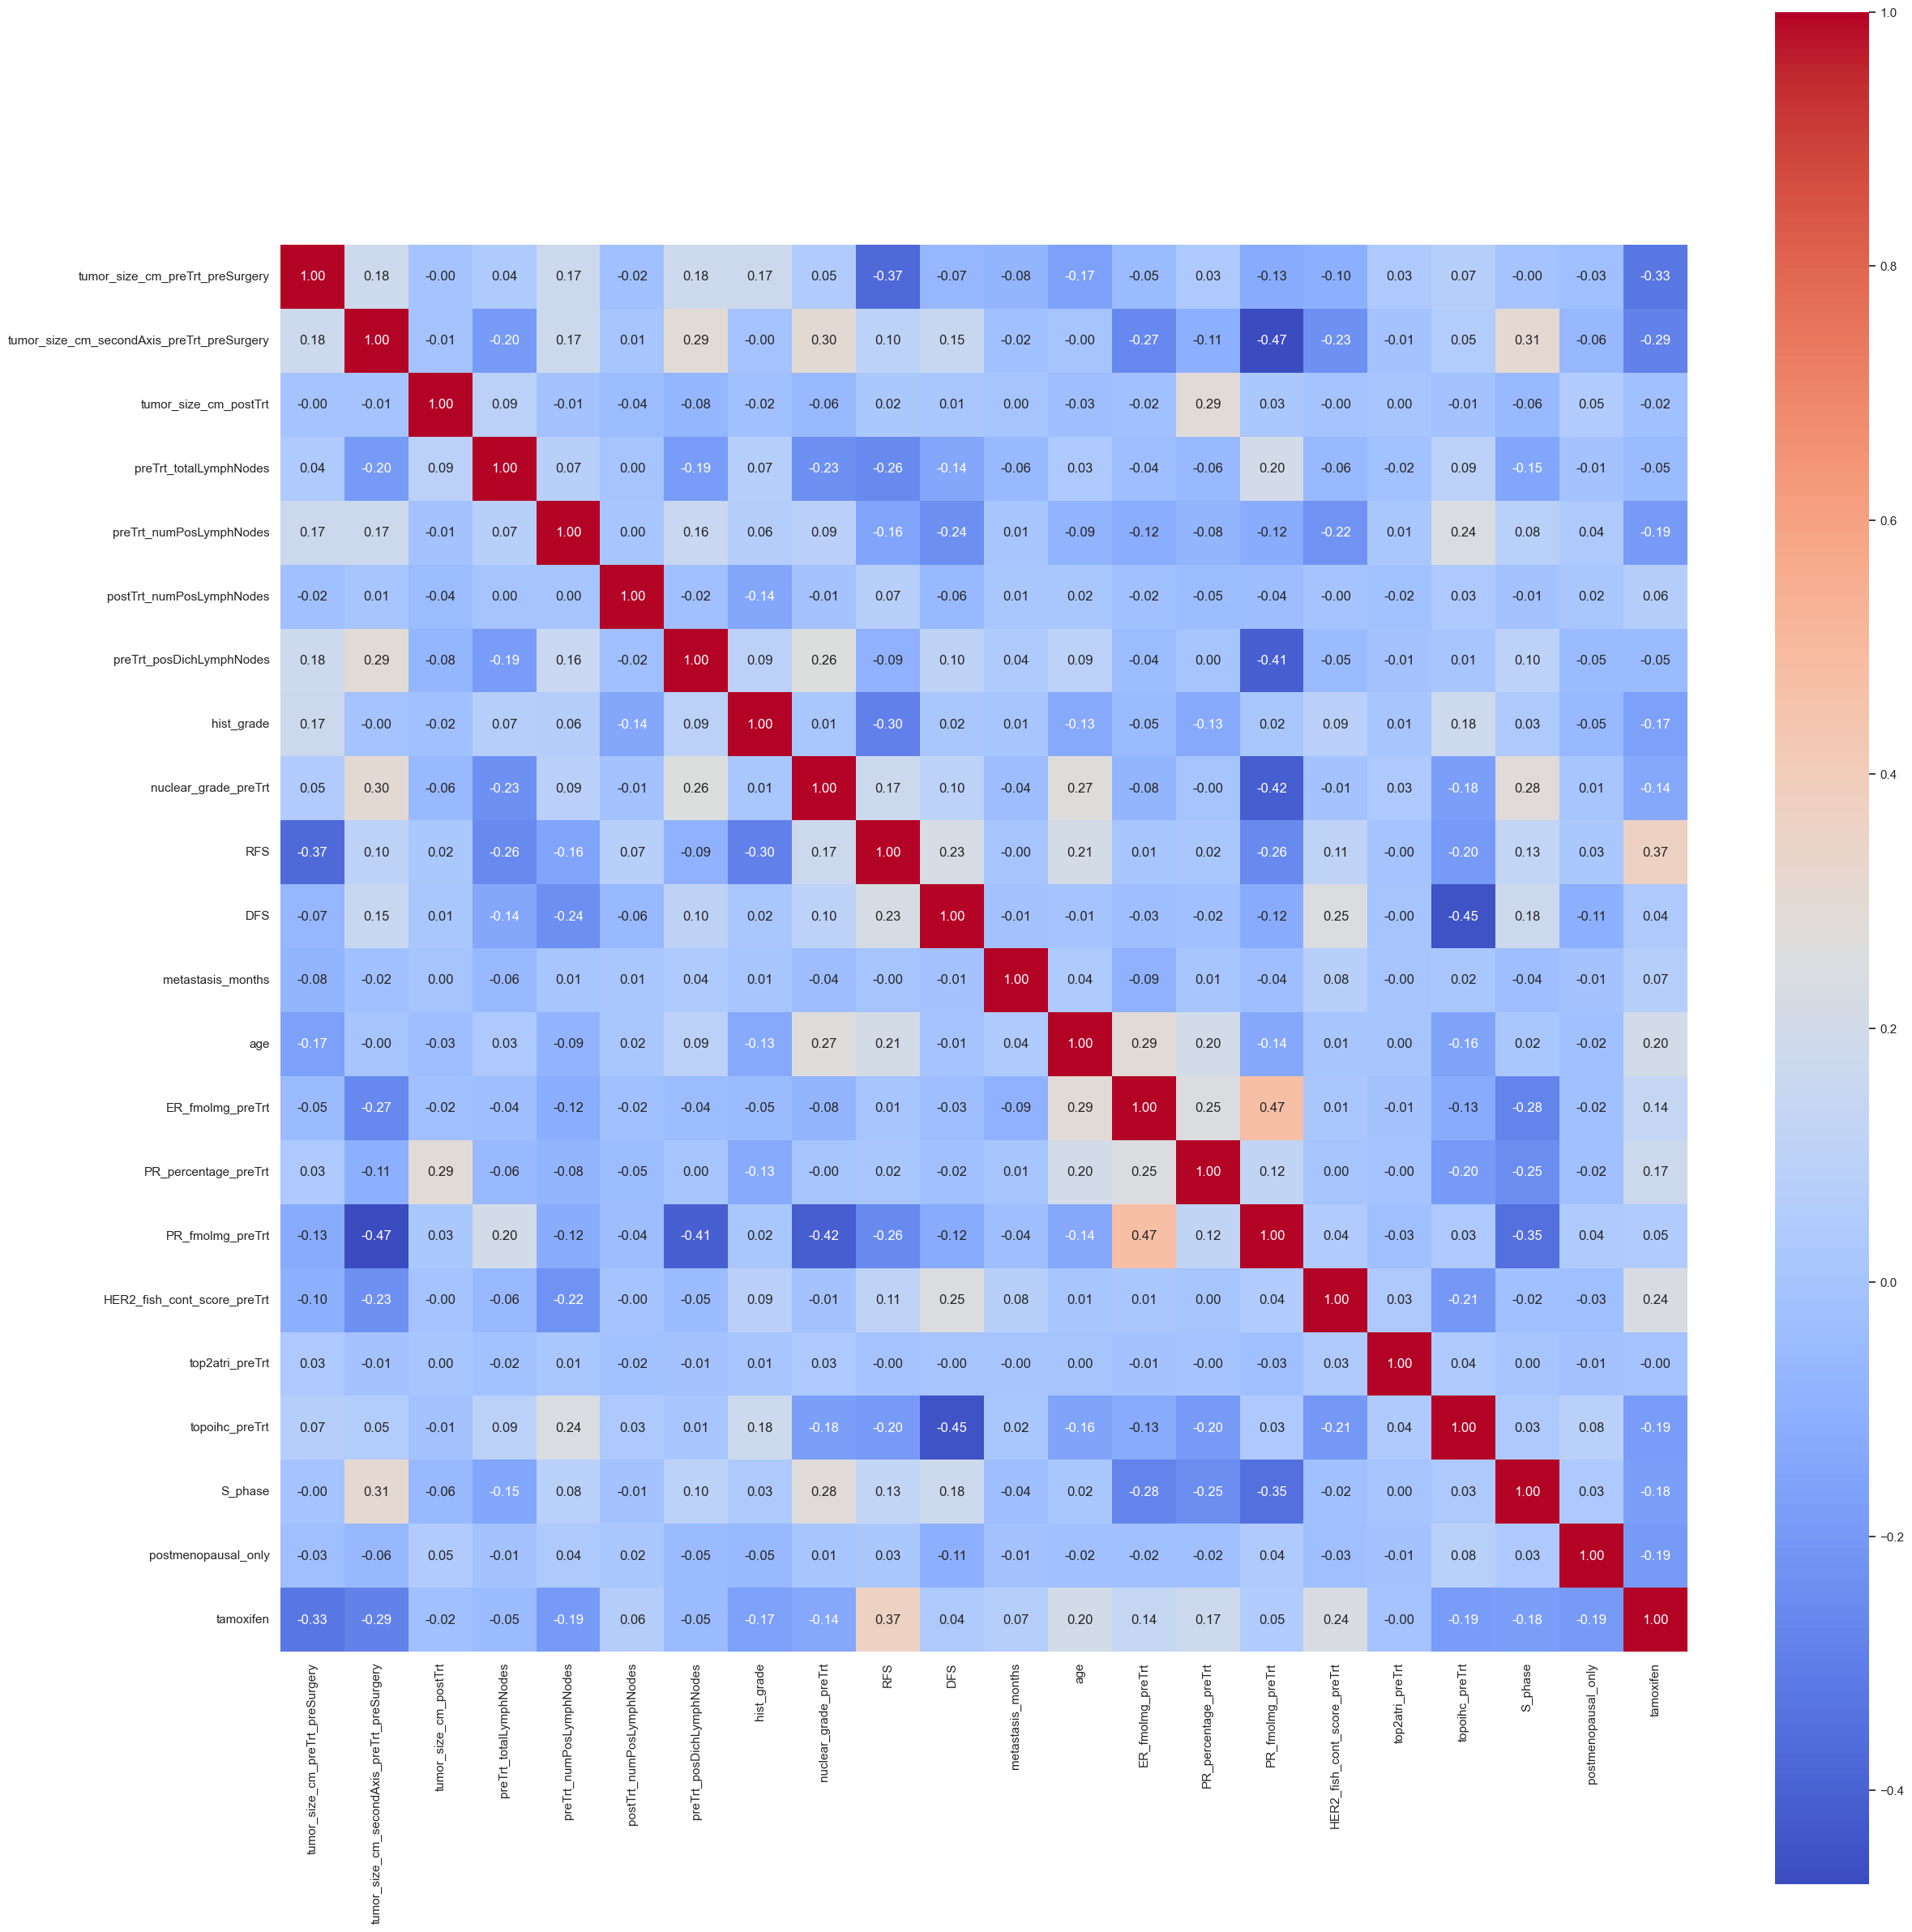

In [74]:
# Select only numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# Dropping columns with only one unique value
X_numeric = X_numeric.loc[:, X_numeric.nunique() != 1]

# Calculate correlation
corr = X_numeric.corr()

# Plot heatmap
plt.figure(figsize=(28, 30))

sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= X_numeric.columns, yticklabels= X_numeric.columns,
           cmap= 'coolwarm')

plt.show()


In [75]:
# Chi-square test of independence to check if there is a significant association between the variables. If the p-value is less than 0.05, you can conclude that the variables are associated.

from scipy.stats import chi2_contingency

# Select categorical columns
X_categorical = X.select_dtypes(include=['object'])

# Calculate Chi-square test of independence
p_values = {}
for col1 in X_categorical.columns:
    for col2 in X_categorical.columns:
        contingency_table = pd.crosstab(X_categorical[col1], X_categorical[col2])
        _, p, _, _ = chi2_contingency(contingency_table)
        # print(f'p-value between {col1} and {col2}: {p}')
        p_values[(col1, col2)] = p
        
# Filter pairs with p-value < 0.05
significant_pairs = {pair: p for pair, p in p_values.items() if p < 0.05}

print(significant_pairs)



{('pCR', 'pCR'): 0.0, ('pCR', 'near_pCR'): 6.278257142339885e-93, ('pCR', 'metastasis'): 0.0034492124064479683, ('pCR', 'ER_preTrt'): 9.516769153892273e-92, ('pCR', 'ESR1_preTrt'): 1.020711240294921e-37, ('pCR', 'ERbb2_preTrt'): 2.6338840143116706e-55, ('pCR', 'ERBB2_CPN_amplified'): 0.012094397928962318, ('pCR', 'PR_preTrt'): 1.057251424628684e-28, ('pCR', 'HER2_preTrt'): 1.6474057368147672e-51, ('pCR', 'cytokeratin5_pos'): 0.0009107352567987877, ('pCR', 'anthracycline'): 1.196422824593145e-13, ('pCR', 'taxane'): 8.213406185200834e-20, ('pCR', 'anti_estrogen'): 0.009853480651484475, ('pCR', 'aromatase_inhibitor'): 1.616411544434086e-61, ('pCR', 'anti_HER2'): 3.93770110217444e-22, ('pCR', 'doxorubicin'): 2.6277391690606894e-53, ('pCR', 'epirubicin'): 0.004000681352410469, ('pCR', 'docetaxel'): 0.0012442195315135623, ('pCR', 'capecitabine'): 0.0007932683214232757, ('pCR', 'fluorouracil'): 9.383224250796268e-10, ('pCR', 'paclitaxel'): 6.464055034574132e-55, ('pCR', 'cyclophosphamide'): 4

In [76]:

# unique columns from significant pairs
significant_columns = set()
for pair in significant_pairs.keys():
    significant_columns.add(pair[0])
    significant_columns.add(pair[1])

# Convert to list
significant_columns = list(significant_columns)

print(significant_columns)

['anti_estrogen', 'doxorubicin', 'trastuzumab', 'near_pCR', 'clinical_AJCC_stage', 'treatment_admin', 'Race', 'HER2_IHC_score_preTrt', 'paclitaxel', 'hormone_therapy', 'therapy', 'cytokeratin5_pos', 'taxane', 'HER2_preTrt', 'metastasis', 'Erbeta_preTrt', 'other_treatment', 'methotrexate', 'ER_preTrt', 'anti_HER2', 'pam50', 'fluorouracil', 'estrogen_receptor', 'tumor_stage_preTrt', 'capecitabine', 'ERBB2_CPN_amplified', 'pCR', 'no_treatment', 'letrozole', 'carboplatin', 'fulvestrant', 'radiotherapy', 'aromatase_inhibitor', 'preTrt_lymph_node_status', 'postTrt_lymph_node_status', 'PR_preTrt', 'ERbb2_preTrt', 'RCB', 'tumor_stage_postTrt', 'epirubicin', 'cetuximab', 'menopausal_status', 'ESR1_preTrt', 'ploidy', 'chemotherapy', 'surgery', 'pCR_spectrum', 'gefitinib', 'cyclophosphamide', 'anastrozole', 'docetaxel', 'anthracycline']


Positive correlations

In [77]:
# # correlation between 2 features and distribution
# sns.jointplot(X.loc[:,'radius_mean'], 
#               X.loc[:,'area_mean'], 
#               kind="scatter")

# sns.jointplot(X.loc[:,'radius_mean'], 
#               X.loc[:,'perimeter_mean'], 
#               kind="regg")

# sns.jointplot(X.loc[:,'area_mean'], 
#               X.loc[:,'perimeter_mean'], 
#               kind="scatter")

In [ ]:
# # correlation between 2 features and distribution
# sns.jointplot(X.loc[:,'radius_mean'], 
#               X.loc[:,'concave points_mean'], 
#               kind="regg")

In [78]:
# # correlation between 2 features and distribution
# sns.jointplot(X.loc[:,'compactness_mean'], 
#               X.loc[:,'concavity_mean'], 
#               kind="regg")

# sns.jointplot(X.loc[:,'compactness_mean'], 
#               X.loc[:,'concave points_mean'], 
#               kind="regg")


# sns.jointplot(X.loc[:,'concavity_mean'], 
#               X.loc[:,'concave points_mean'], 
#               kind="regg")

Negative correlations

In [79]:
# # correlation between 2 features and distribution
# sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
#               X.loc[:,'radius_mean'], 
#               kind="regg")

# sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
#               X.loc[:,'perimeter_mean'], 
#               kind="regg")

# sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
#               X.loc[:,'area_mean'], 
#               kind="regg")

Is dataset balanced?

<Axes: xlabel='OS', ylabel='Count'>

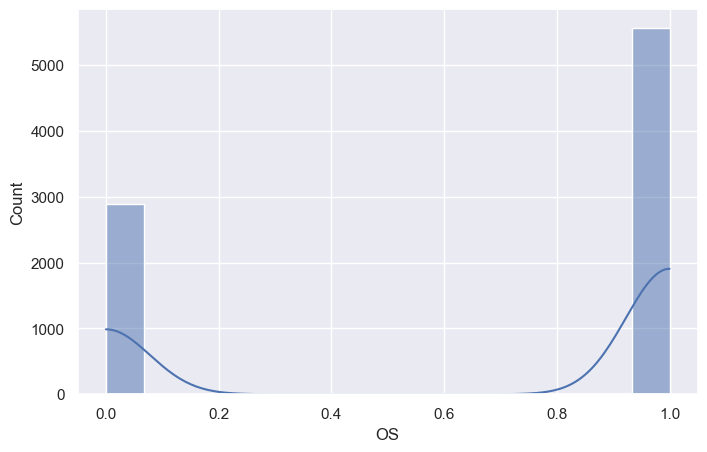

In [80]:
# Plot a countplot
# sns.set_theme(rc={'figure.figsize':(8,5)})
# sns.countplot(y) 
sns.histplot(y, kde=True)

<Axes: xlabel='OS', ylabel='Count'>

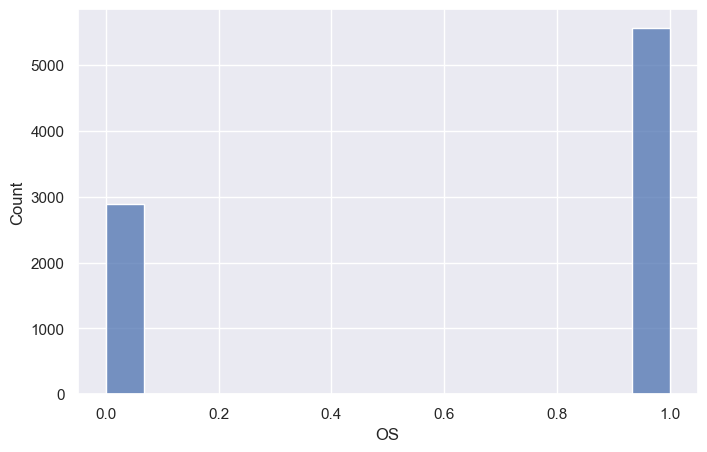

In [81]:
sns.histplot(y, kde=False)

In [86]:
value_counts = df['OS'].value_counts()
print(value_counts)

OS
1    5569
0    2882
Name: count, dtype: int64


Feature scaling

In [90]:
def scaler(df):
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# testing scaler
scaled_df = scaler(X)

scaled_df.head()

,pCR_postTrt_days,tumor_size_cm_preTrt_preSurgery,tumor_size_cm_secondAxis_preTrt_preSurgery,tumor_size_cm_postTrt,preTrt_totalLymphNodes,preTrt_numPosLymphNodes,postTrt_numPosLymphNodes,preTrt_posDichLymphNodes,hist_grade,nuclear_grade_preTrt,...,ploidy_multiploid,estrogen_receptor_NOS,estrogen_receptor_block_and_eliminate,estrogen_receptor_block_and_stop,surgery_mastectomy,surgery_preserving,therapy_adj,therapy_mixed,therapy_neo,therapy_unspecified
0,0.0,0.12,0.6,0.25,0.300,0.090909,0.058824,1.0,1.0,0.5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.12,0.6,0.00,0.375,0.000000,0.235294,1.0,1.0,0.5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.12,0.6,0.25,0.425,0.060606,0.588235,1.0,0.5,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.08,0.6,0.25,0.350,0.212121,0.235294,1.0,0.5,0.5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.08,0.6,0.25,0.175,0.060606,0.176471,0.0,0.5,0.5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Features distribution

In [108]:
# Preparing data
data_plot = pd.concat([y,scaled_df],axis=1)
data_plot = pd.melt(data_plot,id_vars="OS",
                    var_name="features",
                    value_name='value')
# Plot a violinplot
sns.set(rc={'figure.figsize':(15,550)})
sns.violinplot(x="value", y="features", hue="OS", data=data_plot,split=True, inner="quart")

<Axes: xlabel='value', ylabel='features'>

Feature engineering

In [89]:
#the higher the score more important or relevant is the feature towards the target variable.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Dummy data
X = pd.get_dummies(X)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

#  feature importances
importances = rf.feature_importances_

# Print feature importances
# for feature, importance in zip(X.columns, importances):
#     print(f'Feature: {feature}, Importance: {importance}')

# Map feature importances to their corresponding feature names
feature_importances = dict(zip(X.columns, importances))

# Set a threshold for feature importance
threshold = 0.05  # for example

# Get a list of important features
important_features = [feature for feature, importance in feature_importances.items() if importance >= threshold]

print(important_features)    

['preTrt_totalLymphNodes', 'RFS', 'DFS', 'PR_fmolmg_preTrt', 'ESR1_preTrt_N', 'ESR1_preTrt_Y']


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming that 'target' is the name of your target variable
# X = X_numeric.drop('OS', axis=1)
# y = X_numeric['OS']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance}')

ValueError: could not convert string to float: 'Y'

In [ ]:
#Creating a Volume Mean Feature using radius_mean
# Creating a empty list
mean_volume = []
# defining pi
pi = 3.1415

# calculatin mean volume for each mean radius and saving result in mean_volume list
for i in range(len(X)):
    #aving result in mean_volume list
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)

# Creating a new feature
X["mean_volume"]= mean_volume    


In [ ]:
# Creating a new feature adding up some phisical measuraments
X["mesuraments_sum_mean"] = X["radius_mean"] + X["perimeter_mean"] + X["area_mean"]

In [ ]:
X.head()


Feature Scaling
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.[1]



In [ ]:
# Define a scaler function
def scaler(df):
    """The Function receive a Dataframe and return a Scaled Dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# testing scaler
scaled_df = scaler(X)

scaled_df.head()

Features Distribution


In [ ]:
# Preparing data
data_plot = pd.concat([y,scaled_df],axis=1)
data_plot = pd.melt(data_plot,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
# Plot a violinplot
sns.set(rc={'figure.figsize':(15,30)})
sns.violinplot(x="value", y="features", hue="diagnosis", data=data_plot,split=True, inner="quart")


In [ ]:
# Ploting a pairplot Grid
sns.set(style="white")
df = scaled_df.iloc[:,0:9]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)


In [ ]:
# Plot a Swarmplot
sns.set(style="whitegrid", palette="muted")
data_plot = scaled_df
data_plot = pd.concat([y,data_plot.iloc[:,0:]],axis=1)
data_plot = pd.melt(data_plot,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
#plt.figure(figsize=(10,10))
sns.set(rc={'figure.figsize':(15,30)})
sns.swarmplot(x="value", y="features", hue="diagnosis", data=data_plot)

Detect Outliers using Tukey Method


In [ ]:
# Define a function to detect outliers
def remove_outliers(X, y, f=2, distance=1.5):
    
    """The Function receive Features (X) and Label (y) a frequency (f) and Inter-Quartile distance (distance),  
    and return features and labels without outliers (good_X, good_y)"""
    
    outliers  = []

    # For each feature find the data points with extreme high or low values
    for feature in X.keys():

        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(X[feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(X[feature], 75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1) * distance

        outliers.append(X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))].index.values)

    # Select the indices for data points you wish to remove
    flat_list = [item for sublist in outliers for item in sublist]

    # importing Counter
    from collections import Counter
    
    freq = Counter(flat_list)
    # Create a list to store outliers to remove
    outliers_to_remove = []
    
    for key, value in freq.iteritems():
        if value > f:
            outliers_to_remove.append(key)

    # Remove the outliers, if any were specified
    good_X = X.drop(X.index[outliers_to_remove]).reset_index(drop = True)
    good_y    = y.drop(y.index[outliers_to_remove]).reset_index(drop = True)
    # Sort list
    outliers_to_remove.sort()
    # Print outliers founded
    for i in range(len(outliers_to_remove)):
        print "data point: ", outliers_to_remove[i], "is considered outlier to more than ", f, " feature"

    print "All ", len(outliers_to_remove), "were removed!"
    # return data without outliers
    return good_X, good_y 


good_X, good_y = remove_outliers(scaled_df, y, f=2, distance=1.5)

In [ ]:
good_X.head()


In [ ]:
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(good_y) 

In [ ]:
count = y.value_counts()
count2 = good_y.value_counts()

print 'Number of Benign removed: ',count[0] - count2[0] 
print 'Number of Malignant removed: ',count[1] - count2[1] 

Feature Selection using Scikit Learn


In [ ]:
def selector(X, y, k=12):
    
    """The function receive features and labels (X, y) and a target number to select features (k)
    and return a new dataset wiht k best features"""
    
    selector = SelectKBest(chi2, k)
    
    X_new = selector.fit_transform(X, y)
    
    return pd.DataFrame(X_new, columns=X.columns[selector.get_support()])

X_new = selector(X, y, 5)

X_new.head()

pca_df = pd.DataFrame(pca_samples, columns=["d1", "d2"])

data_plot = pd.concat([good_y,pca_df.iloc[:,0:]],axis=1)

sns.lmplot(x="d1", y="d2", hue="diagnosis", data=data_plot,  markers=["x", "o"], fit_reg=False)

In [ ]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=3)
pca.fit(good_X)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(good_X)


In [ ]:
pca_df = pd.DataFrame(pca_samples, columns=["d1", "d2", "d3"])

data_plot = pd.concat([good_y,pca_df.iloc[:,0:]],axis=1)
data_plot.head()

In [ ]:
# plot
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_plot['d1'], data_plot['d2'], data_plot['d3'], s=100)
#ax.view_init(30, 185)
plt.show()

In [55]:
#model?

# Split the data into training and test sets for each target
X_train_OS, X_test_OS, y_train_OS, y_test_OS = train_test_split(X, y_OS, test_size=0.2, random_state=42)
X_train_died, X_test_died, y_train_died, y_test_died = train_test_split(X, y_died, test_size=0.2, random_state=42)

# Create a random forest classifier for each target
rf_OS = RandomForestClassifier(n_estimators=100, random_state=42)
rf_died = RandomForestClassifier(n_estimators=100, random_state=42)

# Train each model
rf_OS.fit(X_train_OS, y_train_OS)
rf_died.fit(X_train_died, y_train_died)